<h1> White Wine Quality</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<h2>Functions</h2>

# <h4> Dataset </h4>

In [2]:
def load_datasets(filename, column_list, target_column):

   
    df = pd.read_csv(filename, delimiter=';')
    X, y = df[column_list].values, df[target_column].values
    return X, y, df

In [3]:
def split_datasets(X, y, test_size = 0.2):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def normalize(X):
    
    mean= X.mean(axis=0)
    std=X.std(axis=0)
    X_new=(X-mean)/std
    return X_new, mean, std

In [5]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

<h4>Analysis of data</h4>

In [6]:
def histograms(data, cols,target_column):
    cols.append(target_column)

    fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(12, 30))
    axs = np.ravel(axs)

    for i, col in enumerate(cols):
        plt.sca(axs[i])
        sns.histplot(data, x=col, 
                     kde=True, fill=True, 
                     line_kws={'lw':2,'ls':'--','color':'k'}, 
                     color='blue')
        plt.title(f"{col} distribution plot", fontdict={'size':16,'color':'k'})
    
    plt.tight_layout()
    plt.show()

In [7]:
def correlation(data):
    plt.figure(figsize=(16, 6))
    sns.heatmap(data.corr(method='spearman'), annot=True)
    plt.title('Correlation', fontdict={'fontsize':12}, pad=12);

In [8]:
def pairpl(data):
    pairplot_columns=['fixed acidity','volatile acidity','residual sugar','pH','alcohol','quality']
    sns.pairplot(data[pairplot_columns])
    plt.show();

# <h4> Linear Regression </h4>

In [9]:
def hypothesis(X, theta):
    h_thetha=np.dot(X,theta)
    return h_thetha

In [10]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (1/(2*m))*np.sum((hypothesis(X, theta) - y)**2)
    return J

In [11]:
def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha=(1/m)*(np.dot(hypothesis(X,theta)-y,X))
    return d_thetha

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):

        delta=alpha*derivative(X,y,theta)
        theta = theta - delta

        J=cost_function(X, y, theta)

        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [13]:
def sklearnAlgorithm(X_train, X_test, y_train, y_test):

    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)

    

    rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
    res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
    print(res)
    d = y_test - y_test_pred
    MSE = metrics.mean_squared_error(y_test, y_test_pred)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    RMSE = np.sqrt(MSE)

    
    return MSE, MAE, RMSE

<h3>Main program</h3>

<h6>Load dataset</h6>

In [14]:
#columns=['citric acid','free sulfur dioxide','sulphates','pH','alcohol']
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_column='quality'
X, y,data = load_datasets('winequality-white.csv',columns , target_column)
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(4898, 11), y=(4898,)


In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [17]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<h4>Data analysis</h4>

<h6>Correlation</h6>

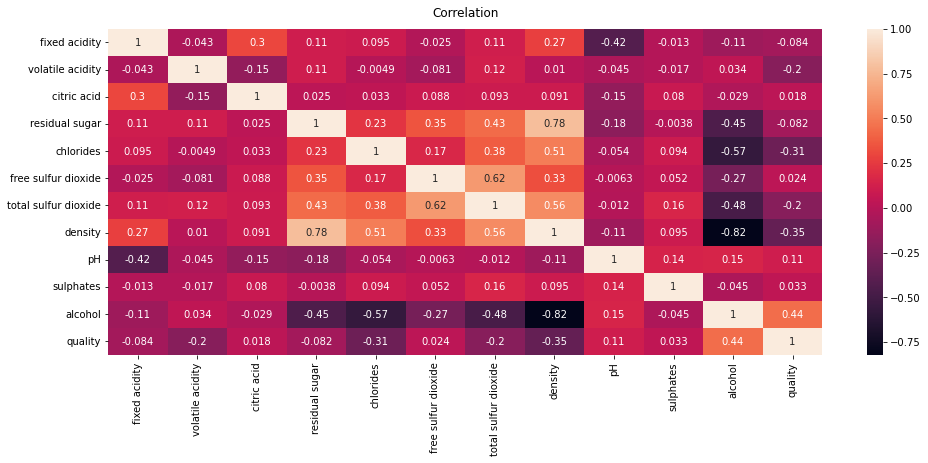

In [18]:
correlation(data)

<h6>Scatter plots</h6>

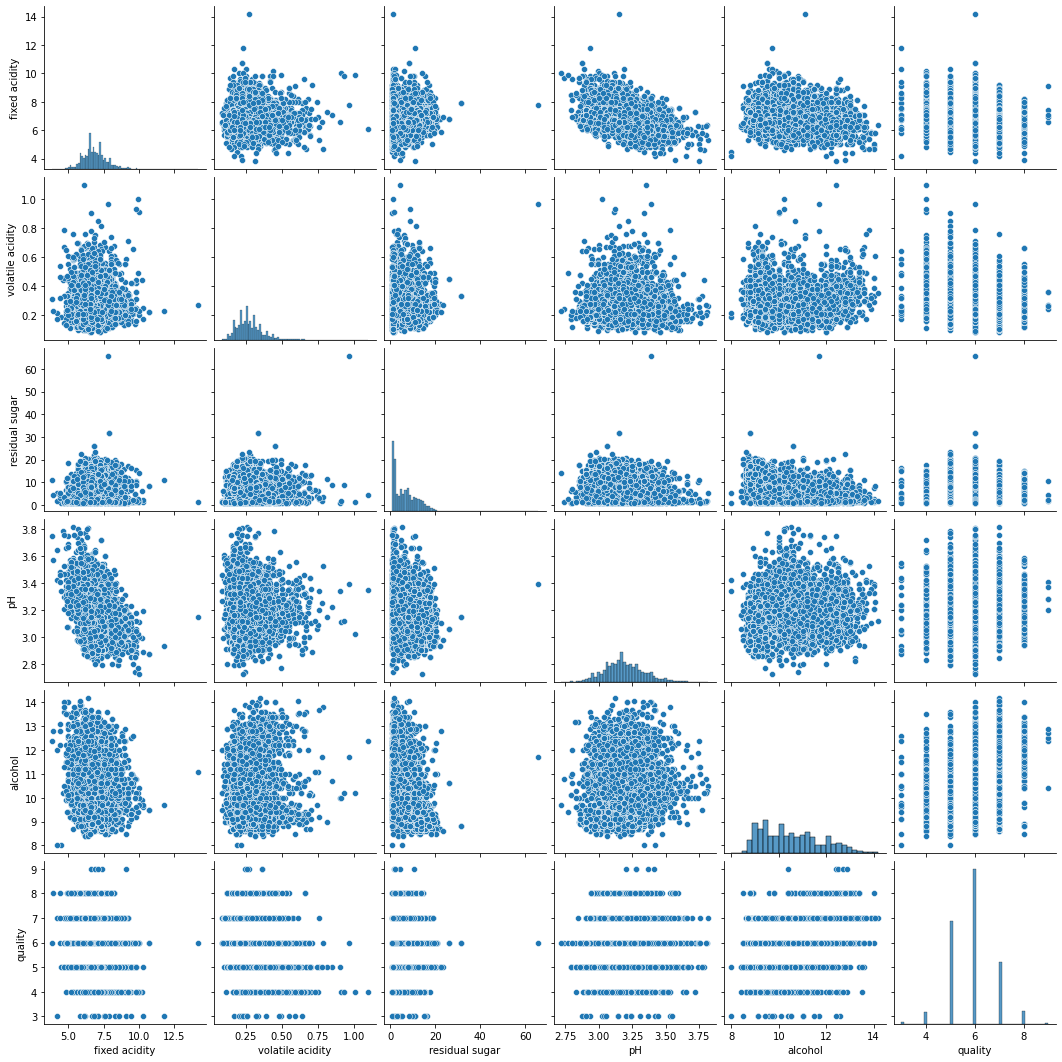

In [19]:
pairpl(data)

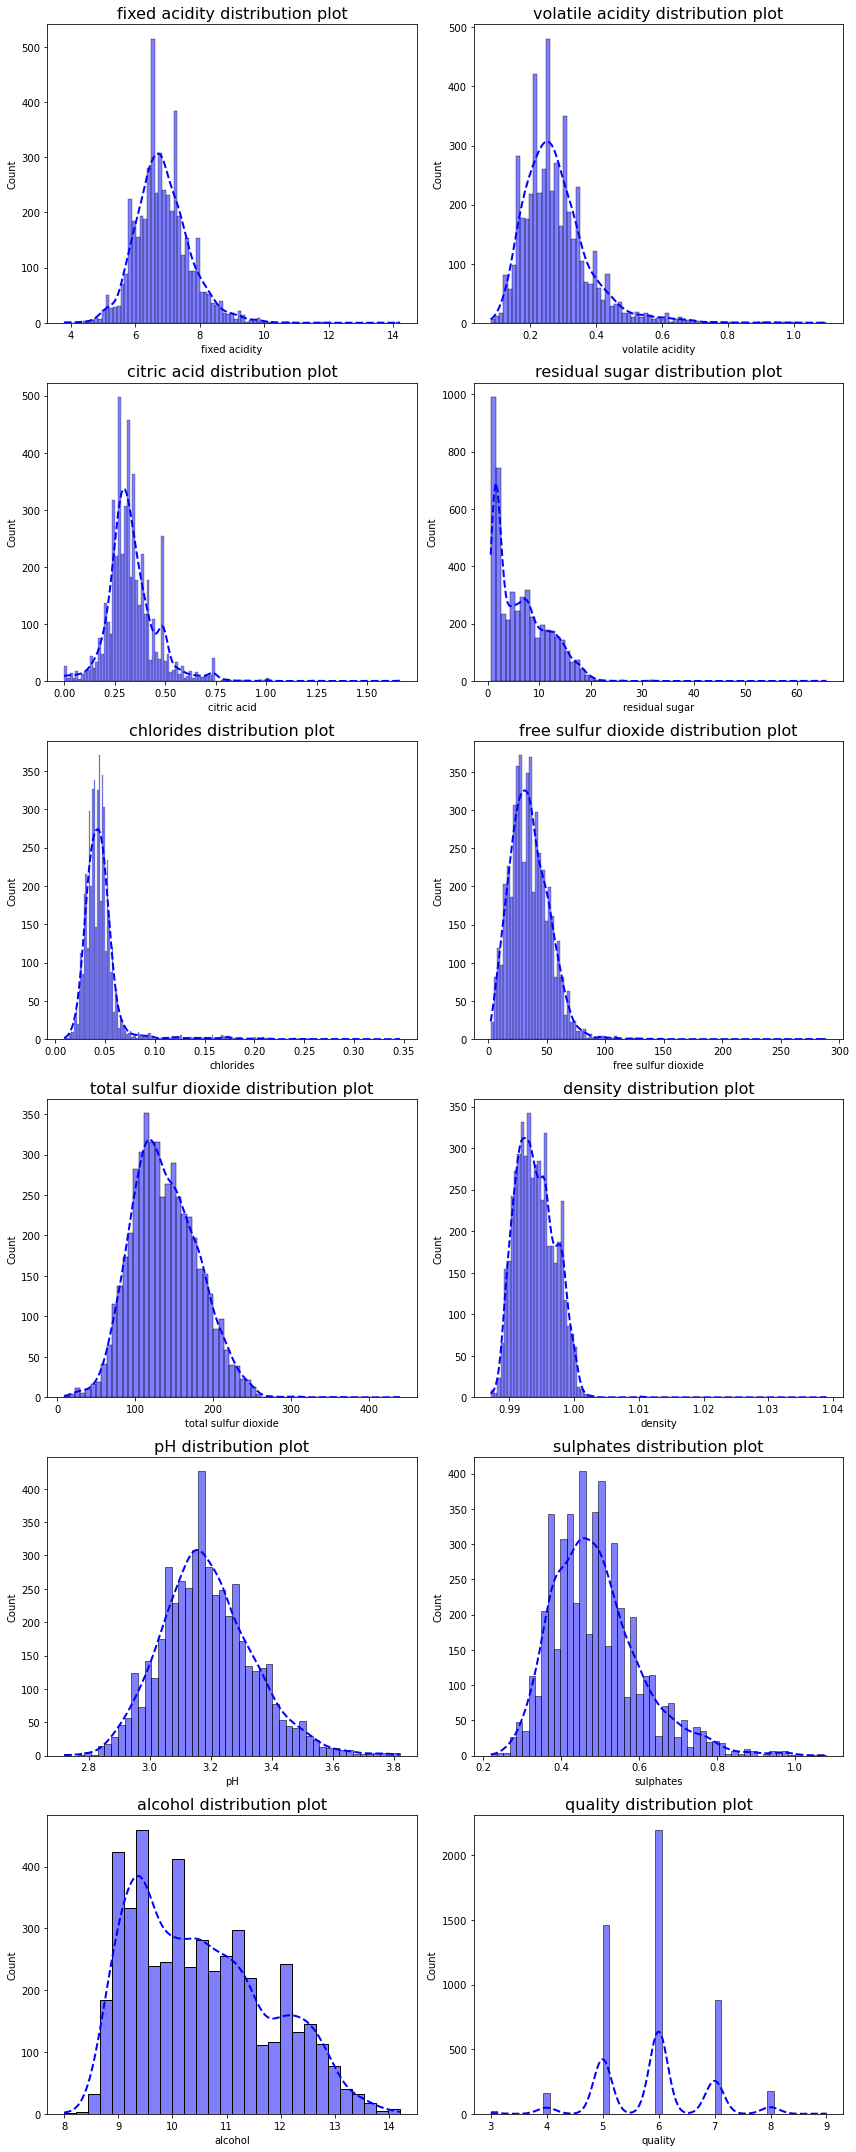

In [20]:
histograms(data,columns,target_column)

<h3>Linear regression</h3>

In [21]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(3918, 11), y=(3918,)
Test set: X=(980, 11), y=(980,)


<h4>SKLearn algorithm</h4>

In [22]:
skl_MSE, skl_MAE, skl_RMSE = sklearnAlgorithm(X_train, X_test, y_train, y_test)

     y_actual    y_pred        err
0           7  6.420347   8.280764
1           5  5.856319  17.126377
2           7  5.835308  16.638450
3           6  5.724329   4.594514
4           5  5.647148  12.942959
..        ...       ...        ...
975         7  6.726742   3.903679
976         7  6.532026   6.685339
977         6  5.979420   0.342995
978         6  6.374697   6.244954
979         6  5.942480   0.958670

[980 rows x 3 columns]


<h4>My algorithm</h4>

In [23]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.zeros(np.shape(columns))

In [24]:
print(X_train_norm)

[[-1.47495627e+00  1.77014728e+00 -7.69267560e-01 ...  6.76754595e-01
  -1.04845634e+00  1.69934816e+00]
 [ 2.93745308e-01  1.86785701e+00 -7.69267560e-01 ...  1.45040652e-01
   6.13472982e-01 -6.60241530e-01]
 [-2.30035034e+00 -4.28321773e-01 -5.22300147e-01 ... -7.85458747e-01
   8.86531974e-02 -9.04337015e-01]
 ...
 [ 1.94453345e+00 -3.79466905e-01  4.65569501e-01 ...  7.85764096e-02
   3.51063090e-01 -4.16146045e-01]
 [ 1.47287969e+00 -1.06343505e+00 -1.01623497e+00 ... -5.43520761e-02
   2.63593126e-01 -3.34780883e-01]
 [ 2.06244689e+00  7.93049920e-01 -6.04622618e-01 ... -1.05131572e+00
   1.18323331e-03  1.21115719e+00]]


In [25]:
y = y_train[:]

In [26]:
print(cost_function(X, y, theta))

17.658882082695254


In [27]:
alpha = 0.01
num_iters = 3000

In [28]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta: {}'.format(new_theta))

Theta: [ 5.87672282e+00 -1.85868942e-03 -2.00048788e-01  1.61243599e-03
  2.81091847e-01 -8.40224108e-03  5.84271072e-02 -1.45322883e-02
 -2.43459892e-01  6.23311736e-02  6.71017923e-02  3.25777744e-01]


In [29]:
X_test, mean, std = normalize(X_test)
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)


MSE = metrics.mean_squared_error(y_test, y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print('MSE  = ', MSE)
print('MAE  = ', MAE)
print('RMSE = ', RMSE)

print(cost_function(X_test_proc, y_test, new_theta))


     y_actual    y_pred        err
0           7  6.382415   8.822637
1           5  5.816603  16.332066
2           7  5.798172  17.168972
3           6  5.683383   5.276942
4           5  5.659280  13.185603
..        ...       ...        ...
975         7  6.719491   4.007266
976         7  6.568230   6.168139
977         6  5.953797   0.770054
978         6  6.371834   6.197240
979         6  5.976823   0.386281

[980 rows x 3 columns]
MSE  =  0.5526487773144361
MAE  =  0.584555803416509
RMSE =  0.7434035090813307
0.27632438865721803


<h4>Compare the results</h4>

In [30]:
print("The difference between my algorithm's errors and slkearn's errors:")
print('MSE:  ', (MSE-skl_MSE))
print('MAE:  ', (MAE-skl_MAE))
print('RMSE: ', (RMSE-skl_RMSE))

The difference between my algorithm's errors and slkearn's errors:
MSE:   0.00313105396559199
MAE:   -0.00019225767534547522
RMSE:  0.002108882533394585
